8th Homework

Exercise 6

a)

In [27]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

i)

In [28]:
N=len(train_y)
N1=len(train_y[train_y==1])
N2=len(train_y[train_y==2])

Pw1=N1/N
Pw2=N2/N

m1=np.mean(train_x[np.where(train_y==1)[0],:],0)
m2=np.mean(train_x[np.where(train_y==2)[0],:],0)

s1=(1/N1)*np.dot((train_x[np.where(train_y==1)[0],:]-m1).T,(train_x[np.where(train_y==1)[0],:]-m1))
s2=(1/N2)*np.dot((train_x[np.where(train_y==2)[0],:]-m2).T,(train_x[np.where(train_y==2)[0],:]-m2))

ii)

In [29]:
from scipy.stats import multivariate_normal

class1score=Pw1*multivariate_normal.pdf(test_x,mean=m1,cov=s1)
class2score=Pw2*multivariate_normal.pdf(test_x,mean=m2,cov=s2)

Btest_y=np.zeros((len(test_y),1))
for i in range(len(test_y)):
    if class1score[i]>class2score[i]:
        Btest_y[i]=1
    else:
        Btest_y[i]=2

iii)

In [30]:
correct=0
for i in range(len(test_y)):
    if Btest_y[i]==test_y[i]:
        correct=correct+1

Berror=1-(correct/len(test_y))
print(Berror)

0.15000000000000002


b)

i)

ii)

In [31]:
from scipy.stats import norm

class1scores=Pw1*norm.pdf(test_x[:,0],m1[0],np.sqrt(s1[0,0]))*norm.pdf(test_x[:,1],m1[1],np.sqrt(s1[1,1]))
class2scores=Pw2*norm.pdf(test_x[:,0],m2[0],np.sqrt(s2[0,0]))*norm.pdf(test_x[:,1],m2[1],np.sqrt(s2[1,1]))


NBtest_y=np.zeros((len(test_y),1))
for i in range(len(test_y)):
    if class1scores[i]>class2scores[i]:
        NBtest_y[i]=1
    else:
        NBtest_y[i]=2

iii)

In [32]:
correct=0
for i in range(len(test_y)):
    if NBtest_y[i]==test_y[i]:
        correct=correct+1

NBerror=1-(correct/len(test_y))
print(NBerror)

0.16500000000000004


c)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

KN=KNeighborsClassifier(n_neighbors=5)
KN.fit(train_x,train_y)

KNtest_y=KN.predict(test_x)

correct=0
for i in range(len(test_y)):
    if KNtest_y[i]==test_y[i]:
        correct=correct+1

KNerror=1-(correct/len(test_y))
print(KNerror)

0.17000000000000004


C:\Users\sotir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


d)

In [34]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(train_x,train_y)

LRtest_y=LR.predict(test_x)

correct=0
for i in range(len(test_y)):
    if LRtest_y[i]==test_y[i]:
        correct=correct+1

LRerror=1-(correct/len(test_y))
print(LRerror)

0.15500000000000003


C:\Users\sotir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


e)

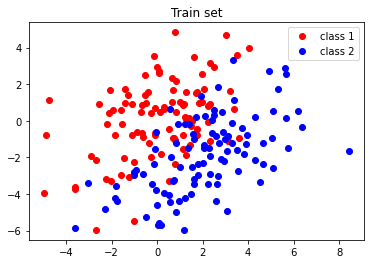

In [35]:
plt.plot(train_x[np.where(train_y==1)[0],0],train_x[np.where(train_y==1)[0],1],'ro',label='class 1')
plt.plot(train_x[np.where(train_y==2)[0],0],train_x[np.where(train_y==2)[0],1],'bo',label='class 2')
plt.legend()
plt.title('Train set')
plt.show()

f)

In [36]:
print('Bayes error is ',Berror)

print('Naive Bayes error is ',NBerror)

print('KNeighbors error is ',KNerror)

print('Logistic Regression error is ',LRerror)


Bayes error is  0.15000000000000002
Naive Bayes error is  0.16500000000000004
KNeighbors error is  0.17000000000000004
Logistic Regression error is  0.15500000000000003


From the results above, it can be seen that the Bayes classifier is the best out of the four. The Logistic regression is very close to the Bayes classifier. The reason is that from the graph above we can see that the two classes can be linearly separated relative well, so the logistic regression gives good results. The KNeighbors classifier gives the worst results out of the four. The naive Bayes classifier is a little worse than the Bayes classifier. The reason is that the covariances is not diagonal and we get slightly different results. If the covariances of the two classes were diagonal then the naive Bayes and the Bayes classifier would be the same. 